In [78]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
%matplotlib inline

# Business Understanding

## Scenario
- The business wants us to forecast the given spreadsheet on their transactions.
- `Our Goal`: is to predict what it will be in the future.

- Forecasting transaction
- Regression
- Data should be consistent for 3 years
- Some data quality is okay

# Data Understanding

## Discovery

In [3]:
from google.colab import files
upload = files.upload()

Saving regression.csv to regression.csv


In [4]:
pan = pd.read_csv('regression.csv')
pan.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
pan.columns

In [75]:
# What datatypes do we have?
pan.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [76]:
# Check uniquenes
for val in pan.columns:
    print(val, len(pan[val].unique()), pan[val].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]
Period 12 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day 1 [1]
Date 36 ['2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-

- Most of our data consists of categorical or string objects
- Next let's check how much memory our data is using?

In [8]:
pan.memory_usage(deep=True).sum()

1184348

- The dataset is only using 1MB so our training can be quicker

## Relationship Analysis
- Visualizing our dataset.
- Using seaborn | Plotly

In [ ]:
# Integer columns
pan.select_dtypes(int).describe()

In [ ]:
sns.heatmap(pan.corr(), annot=True).set_title('Basic Correlation')

In [24]:
corrdict = {}
for key, row in pan.join(pd.get_dummies(pan['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}
# Change to dataframe and convert rows into individual columns and replace Nan with fillna
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

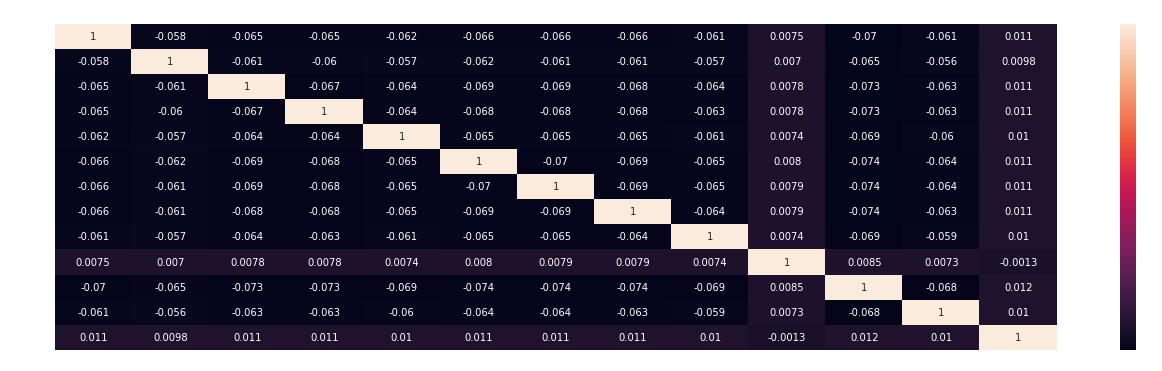

In [30]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr(), annot=True).set_title('Account Correlation')
plt.show()

In [ ]:
# Plot 1: This can be used instead of a box plot
plt.figure(figsize=(18,7))
sns.violinplot(x='Account Type', y='Amount', data=pan)
plt.show()

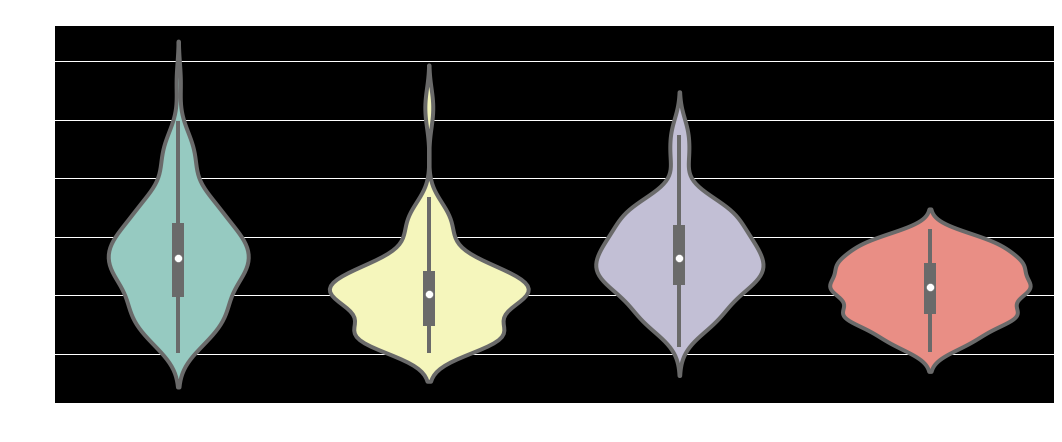

In [69]:
# Let's focus on our Revenue Account Type
plt.figure(figsize=(16,7))
sns.violinplot(x='Account Description', y='Amount', data=pan[pan['Account Type']=='Revenue']).set_title('Revenue ViolinPlot')
plt.show()

In [ ]:
fig = px.histogram(pan, x="Amount",
                   title='Histogram of Amount',
                   labels={'Amount':'Amount bill'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred'] # color of histogram bars
                   )
fig.show()

In [ ]:
fig = px.histogram(pan, x="Amount", color="Account Type")
fig.show()

In [ ]:
sns.relplot(x='Amount', y='Account', hue='Account Description', data=pan)

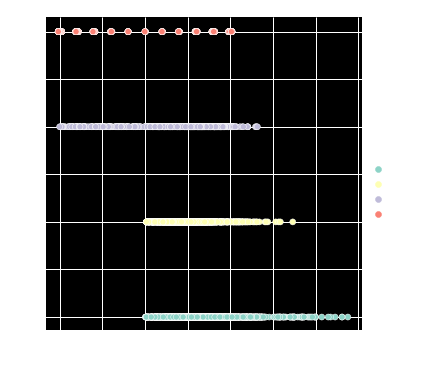

In [89]:
sns.relplot(x='Amount', y='Account', hue='Account Type', data=pan)

In [47]:
# Review Trends
# Create a Period, Day, and Date columns by combining Year and Month
monthmap = {}
monthmap['Jan'] = 1
monthmap['Feb'] = 2
monthmap['Mar'] = 3
monthmap['Apr'] = 4
monthmap['May'] = 5
monthmap['Jun'] = 6
monthmap['Jul'] = 7
monthmap['Aug'] = 8
monthmap['Sep'] = 9
monthmap['Oct'] = 10
monthmap['Nov'] = 11
monthmap['Dec'] = 12

In [48]:
pan['Period'] = pan['Month'].apply(lambda x: monthmap[x])
pan['Day'] = 1
pan['Date'] = pan["Year"].astype(str) + '-' + pan["Period"].astype(str) + '-' + pan["Day"].astype(str)
# Convert the static Date to Datetime
pan['Date'] = pd.to_datetime(pan['Date'])

In [ ]:
sns.pairplot(pan)

# Data Prep
- Use a **For loop** to get **unique** values in **Account column** based on **Account Description**
- Seaborn lineplot visual

In [ ]:
for acc in pan['Account'].unique():
    plt.figure(figsize=(23,9))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=pan[pan['Account']==acc]).set_title(f'{acc} by Month')
    plt.show()

- Let's remove the Inventory datatype from the Account Description column 
- The Inventory does not follow the same trend

In [ ]:
# Convert fields to their types
pan['Account'] = 'ACC' + pan["Account"].astype(str)
pan.head()

In [93]:
pan = pan.drop(['Period', 'Day', 'Date'], axis=1)

- If we have the same number of datypes for:
  - Account and Account Description 
- Then we can drop one of the columns

In [94]:
len(pan['Account'].unique())

13

In [95]:
len(pan['Account Description'].unique())

13

In [96]:
pan['AccountVal'] = pan['Account'] + pan['Account Description']

In [97]:
len(pan['AccountVal'].unique())

13

In [98]:
pan.drop(['AccountVal', 'Account Description'], axis=1, inplace=True)
pan.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


## One-Hot Conversion
- The ML doesn't handle categorical data types well
- One-hot converts categorical features to features the ML can understand

In [99]:
# All datasets require get_dummies
pan = pd.get_dummies(pan)
pan.head()

,Year,Amount,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Cost Centre_CC100,Cost Centre_CC101,Cost Centre_CC102,Cost Centre_CC200,Cost Centre_CC201,Cost Centre_CC202,Cost Centre_CC300,Cost Centre_CC301,Cost Centre_CC302,Account_ACC1000000,Account_ACC1000001,Account_ACC1000002,Account_ACC1000004,Account_ACC2000000,Account_ACC2000001,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,2019,1344.051,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019,480.968,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2019,650.820,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019,339.360,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2019,1125.328,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# Modeling

## Split into Test | Train

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score, mean_absolute_error

In [102]:
X = pan.drop('Amount', axis=1)
y = pan['Amount']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X: {X_train.shape}, {X_test.shape}\nY: {y_train.shape}, {y_test.shape}')

X: (3369, 39), (843, 39)
Y: (3369,), (843,)


## Creating a pipeline

- Now we going to run different models
- To check which model performs better
- Deploy the winning model
- We are going to create 5 pipelines:
  - **Ridge, Lasso, ElasticNet**
  - **RandomForestRegressor, GradientBoostReggressor**

In [107]:
pipelines = {}
pipelines['Rf'] = make_pipeline(RandomForestRegressor(random_state=42))
pipelines['Gb'] = make_pipeline(GradientBoostingRegressor(random_state=42))
pipelines['Ridge'] = make_pipeline(Ridge(random_state=42))
pipelines['Lasso'] = make_pipeline(Lasso(random_state=42))
pipelines['Enet'] = make_pipeline(ElasticNet(random_state=42))

In [ ]:
RandomForestRegressor().get_params()

In [109]:
hypergrid = {
    'Rf':
    {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3],
    },
    'Gb':
    {
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'Ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'Lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'Enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

## Hyperparameter tuning

In [111]:
fit_models = {}
for algo, pipeline in pipelines.items():
    # cv = cross-validation | n_jobs = use all the cpu's available in our mission
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print(f'Training for {algo}')
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print(f'{algo} was successfully fitted')
    except NotFittedError as e:
        print(repr(e))

Training for Rf
Rf was successfully fitted
Training for Gb
Gb was successfully fitted
Training for Ridge
Ridge was successfully fitted
Training for Lasso
Lasso was successfully fitted
Training for Enet
Enet was successfully fitted


In [ ]:
# Generating prediction
fit_models['Rf'].predict(X_test)

In [114]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(f'{algo} scores - R2:{r2_score(y_test, yhat)} || MAE:{mean_absolute_error(y_test, yhat)}')

Rf scores - R2:0.874466049044148 || MAE:106.72766430604982
Gb scores - R2:0.4525565895705621 || MAE:249.84986339336055
Ridge scores - R2:0.30506290545669956 || MAE:282.55344712551454
Lasso scores - R2:0.30465238296320185 || MAE:282.7607752236323
Enet scores - R2:0.3062694708574947 || MAE:282.33656799979786
